In [1]:
import glob
import matplotlib.pyplot as plt
from model.utils import get_yaml_config
import numpy as np

from pprint import pprint
import pickle as pkl

# Embedding dimension

In [2]:
w2v = pkl.load(open('../../Documents/word-embedding-dimensionality-selection/params/Word2VecMatrix/pip_loss_0.5.pkl', 'rb'))
word2vec_optimal_dim = np.argmin(w2v)

glove = pkl.load(open('../../Documents/word-embedding-dimensionality-selection/params/GloVeMatrix/pip_loss_0.5.pkl', 'rb'))
glove_optimal_dim = np.argmin(glove)

lsa = pkl.load(open('../../Documents/word-embedding-dimensionality-selection/params/LSAMatrix/pip_loss_0.5.pkl', 'rb'))
lsa_optimal_dim = np.argmin(lsa)

print(f'W2V = {word2vec_optimal_dim}, Glove = {glove_optimal_dim}, LSA = {lsa_optimal_dim}')

W2V = 72, Glove = 61, LSA = 75


In [3]:
filenames = glob.glob('experiments/dim_selection/swem_max_emb_size=*/*.yaml')
filenames.remove('experiments/dim_selection/swem_max_emb_size=5000/config.yaml')

In [4]:
sizes = []
f1s = []
aver_prs = []
roc_aucs = []

for filename in filenames:
    config = get_yaml_config(filename)
    
    sizes.append(int(config['emb_dim']))
    f1s.append(np.round(float(config['f1']), 5))
    aver_prs.append(np.round(float(config['aver_pr']), 5))
    roc_aucs.append(np.round(float(config['roc_auc']), 5))

In [5]:
config = get_yaml_config('experiments/gru_exp/config.yaml')

sizes.append(1)
f1s.append(np.round(float(config['f1']), 2))
aver_prs.append(np.round(float(config['aver_pr']), 2))
roc_aucs.append(np.round(float(config['roc_auc']), 2))

In [6]:
pprint(config)

{'arch_name': 'gru',
 'aver_pr': '0.08211488933123134',
 'batch_size': 2048,
 'data_dir': 'data/full_corpus/',
 'emb_dim': 300,
 'f1': '0.16476892163429338',
 'learning_rate': 0.001,
 'model_dir': 'experiments/gru_exp',
 'num_epochs': 3,
 'num_treatments': 2207,
 'roc_auc': '0.8405454463129971',
 'seq_len': 40,
 'train_size': 266709,
 'trainable_emb': True,
 'treatments_vocab_path': 'data/full_corpus/treatments.txt',
 'units': {'gru': [128, 64],
           'gru_feats': [128, 64],
           'swem_aver': 128,
           'swem_max': 128,
           'swem_max_features': [128, 64]},
 'use_pretrained': False,
 'vocab_frac': 1.0,
 'word2vec_filename': 'data/word2vec_treatments_300.txt'}


In [7]:
f1s = [x for x, y in sorted(zip(f1s, sizes))]
aver_prs = [x for x, y in sorted(zip(aver_prs, sizes))]
roc_aucs = [x for x, y in sorted(zip(roc_aucs, sizes))]
sizes = sorted(sizes)

In [20]:
out = dict(f1s=f1s, aver_prs=aver_prs, roc_aucs=roc_aucs, sizes=sizes)

In [21]:
import pickle as pkl

In [22]:
pkl.dump(out, open('out.pkl', 'wb'))

In [23]:
import re

'214'

In [8]:
sizes[0] = 'GRU'

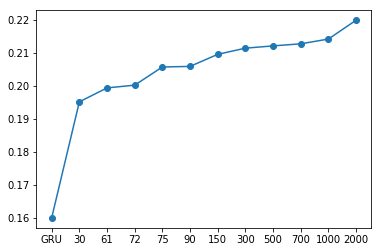

In [16]:
plt.plot(sizes, f1s, '-o')
plt.show()

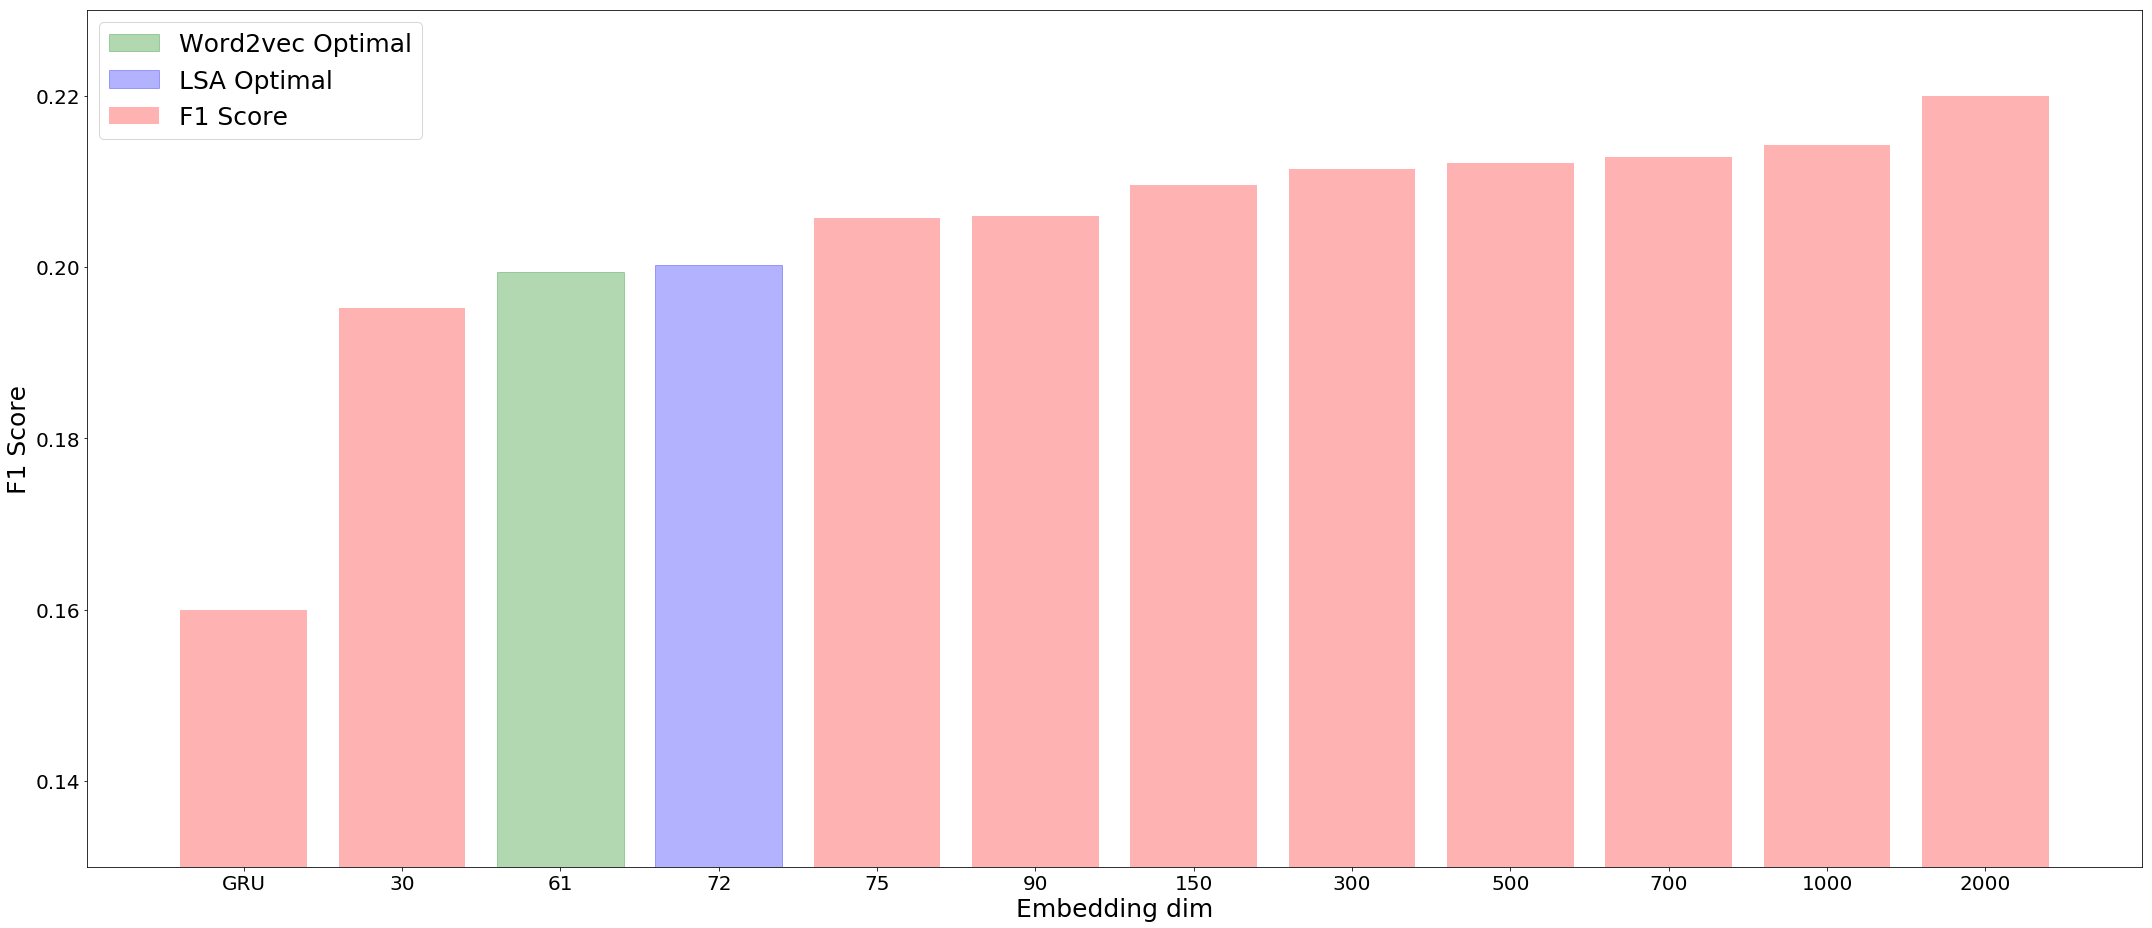

In [17]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in sizes], 
                f1s,
                alpha=0.3,
                color='red',
                label='F1 Score')

rects1[3].set_color('blue')
rects1[3].set_label('LSA Optimal')

rects1[2].set_color('green')
rects1[2].set_label('Word2vec Optimal')

ax.set_xlabel('Embedding dim', size=25)
ax.set_ylabel('F1 Score', size=25)
# ax.set_xticklabels(labs)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)
ax.set_ylim((0.13, 0.23))

fig.tight_layout()
plt.show()

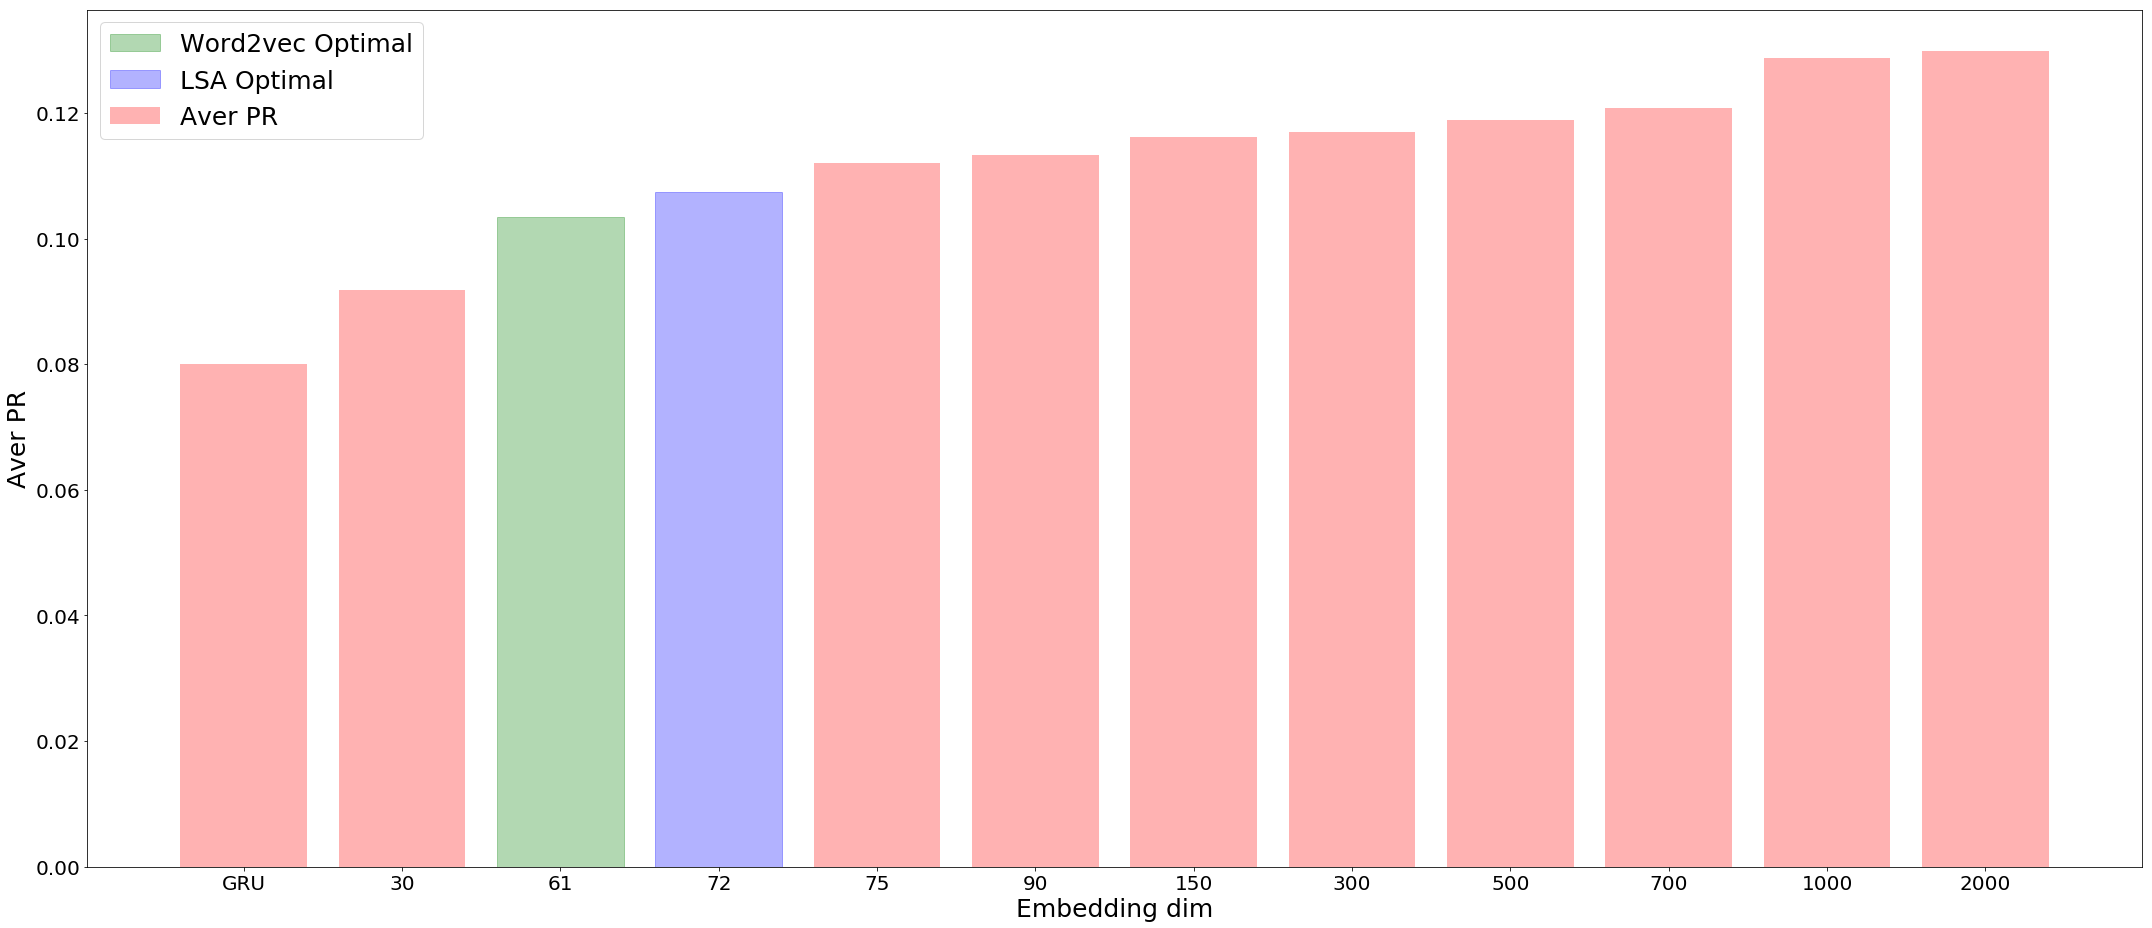

In [53]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in sizes], 
                aver_prs,
                alpha=0.3,
                color='red',
                label='Aver PR')

rects1[3].set_color('blue')
rects1[3].set_label('LSA Optimal')

rects1[2].set_color('green')
rects1[2].set_label('Word2vec Optimal')

ax.set_xlabel('Embedding dim', size=25)
ax.set_ylabel('Aver PR', size=25)
# ax.set_xticklabels(labs)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

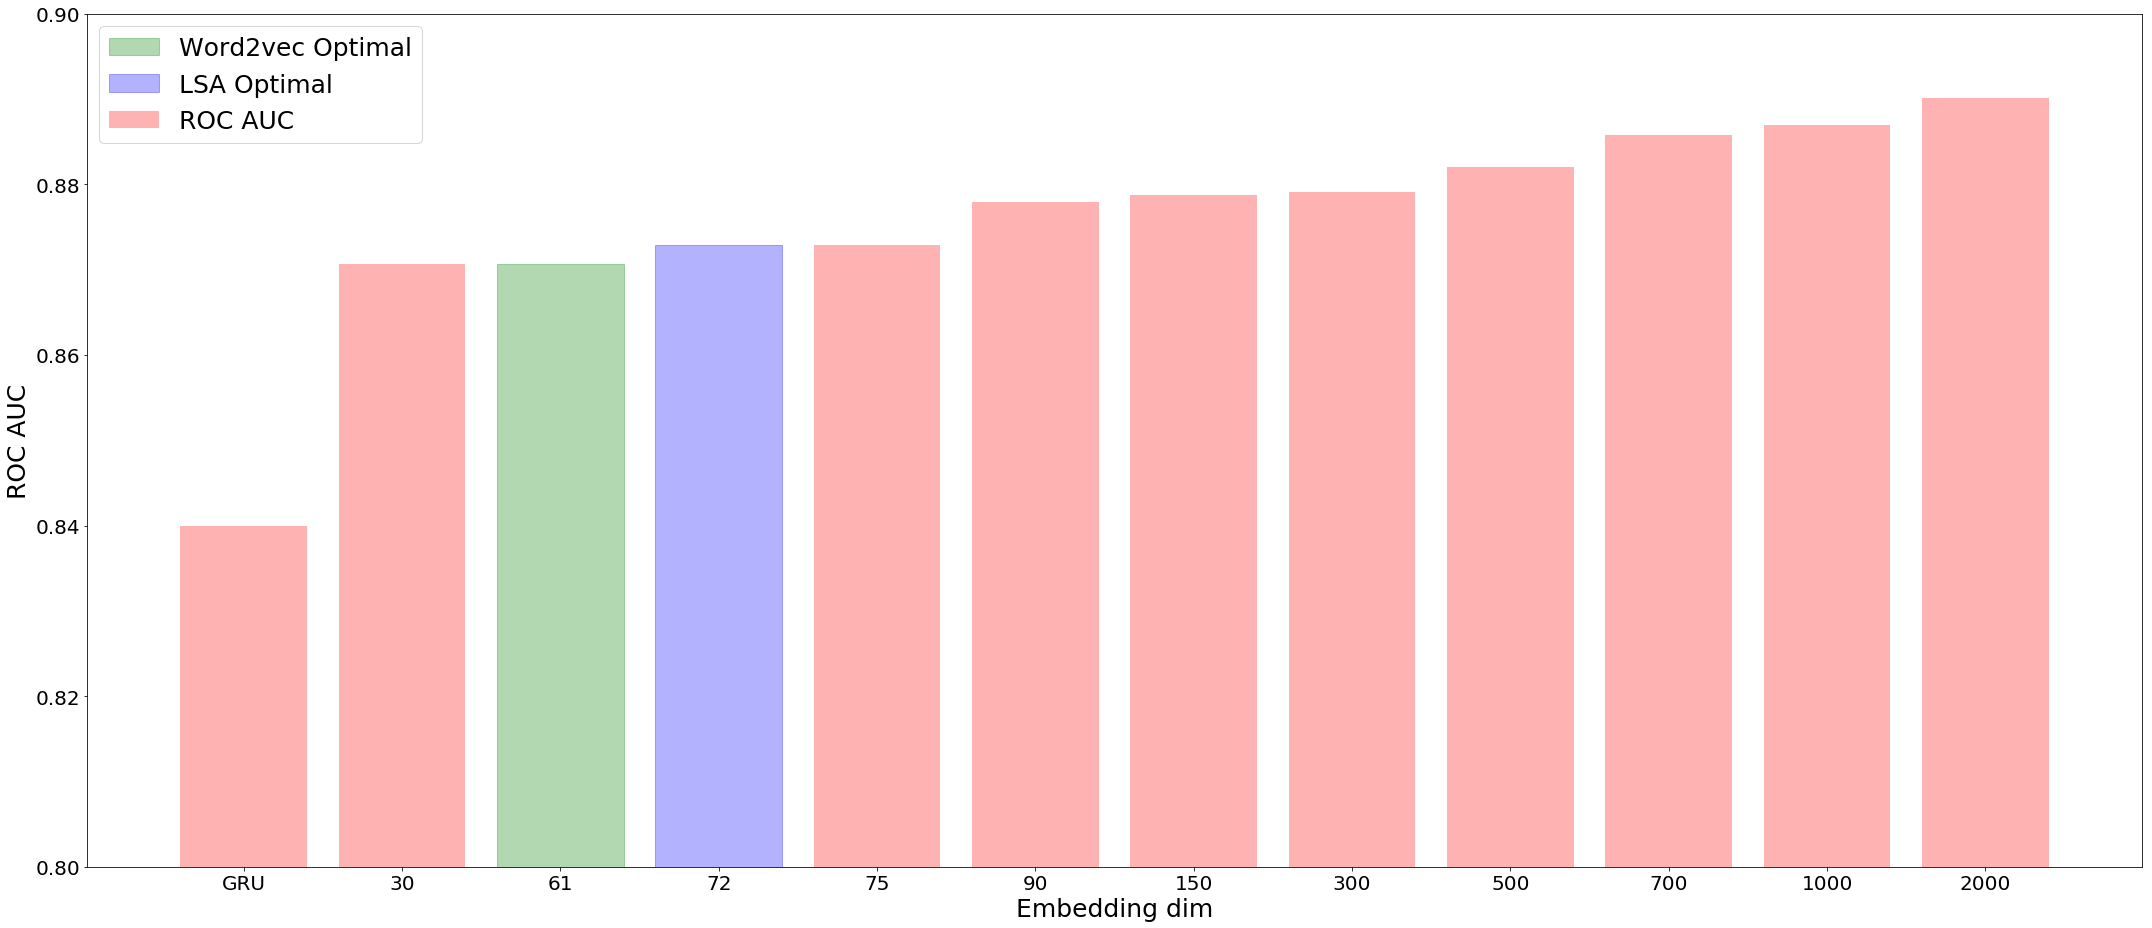

In [54]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in sizes], 
                roc_aucs,
                alpha=0.3,
                color='red',
                label='ROC AUC')

rects1[3].set_color('blue')
rects1[3].set_label('LSA Optimal')


rects1[2].set_color('green')
rects1[2].set_label('Word2vec Optimal')

ax.set_xlabel('Embedding dim', size=25)
ax.set_ylabel('ROC AUC', size=25)
# ax.set_xticklabels(labs)
ax.set_ylim(0.8, 0.9)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

## How vocab sizes affects metrics

In [2]:
filenames = glob.glob('experiments/vocab_size_experiment/swem_max_vocab_frac=*/*.yaml')

In [3]:
sizes = []
f1s = []
aver_prs = []
roc_aucs = []

for filename in filenames:
    config = get_yaml_config(filename)
    
    sizes.append(int(config['num_treatments']))
    f1s.append(np.round(float(config['f1']), 2))
    aver_prs.append(np.round(float(config['aver_pr']), 2))
    roc_aucs.append(np.round(float(config['roc_auc']), 2))

In [4]:
f1s = [x for x, y in sorted(zip(f1s, sizes))]
aver_prs = [x for x, y in sorted(zip(aver_prs, sizes))]
roc_aucs = [x for x, y in sorted(zip(roc_aucs, sizes))]
sizes = sorted(sizes)

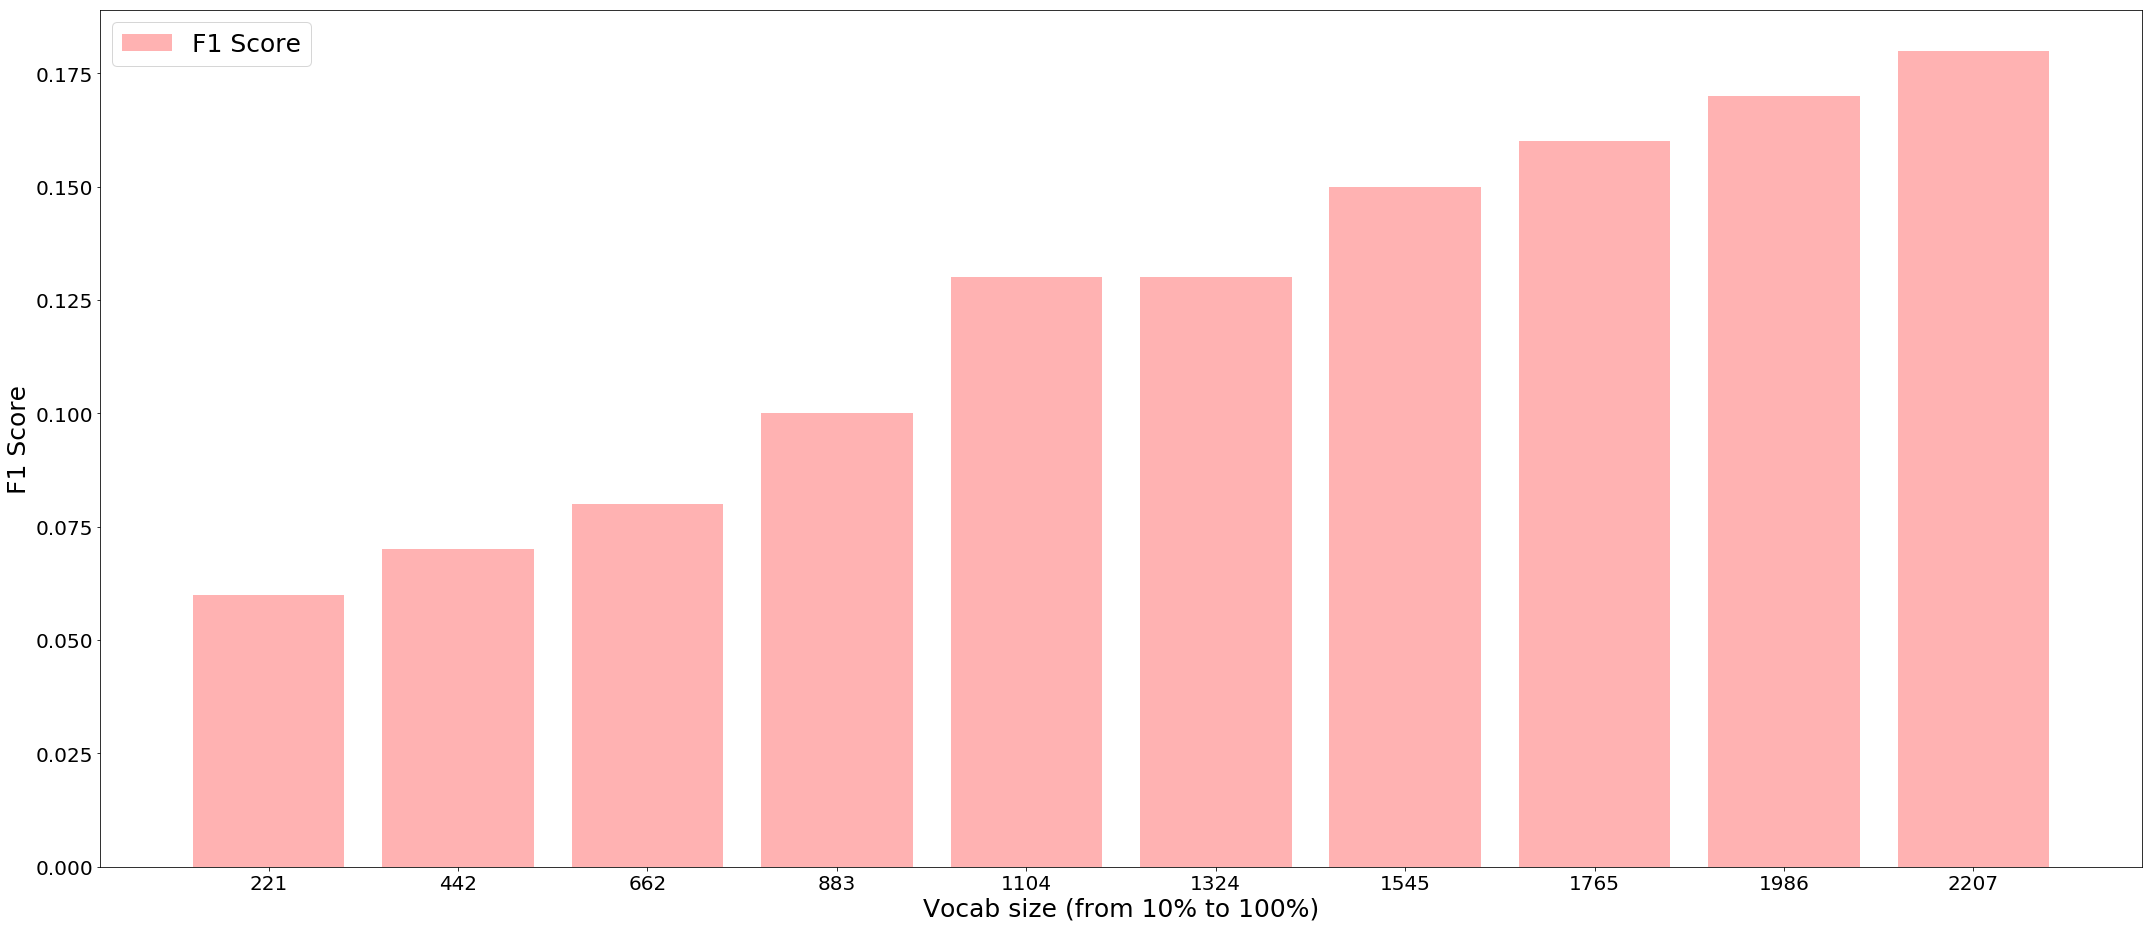

In [5]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in sizes], 
                f1s,
                alpha=0.3,
                color='red',
                label='F1 Score')

ax.set_xlabel('Vocab size (from 10% to 100%)', size=25)
ax.set_ylabel('F1 Score', size=25)
# ax.set_xticklabels(labs)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

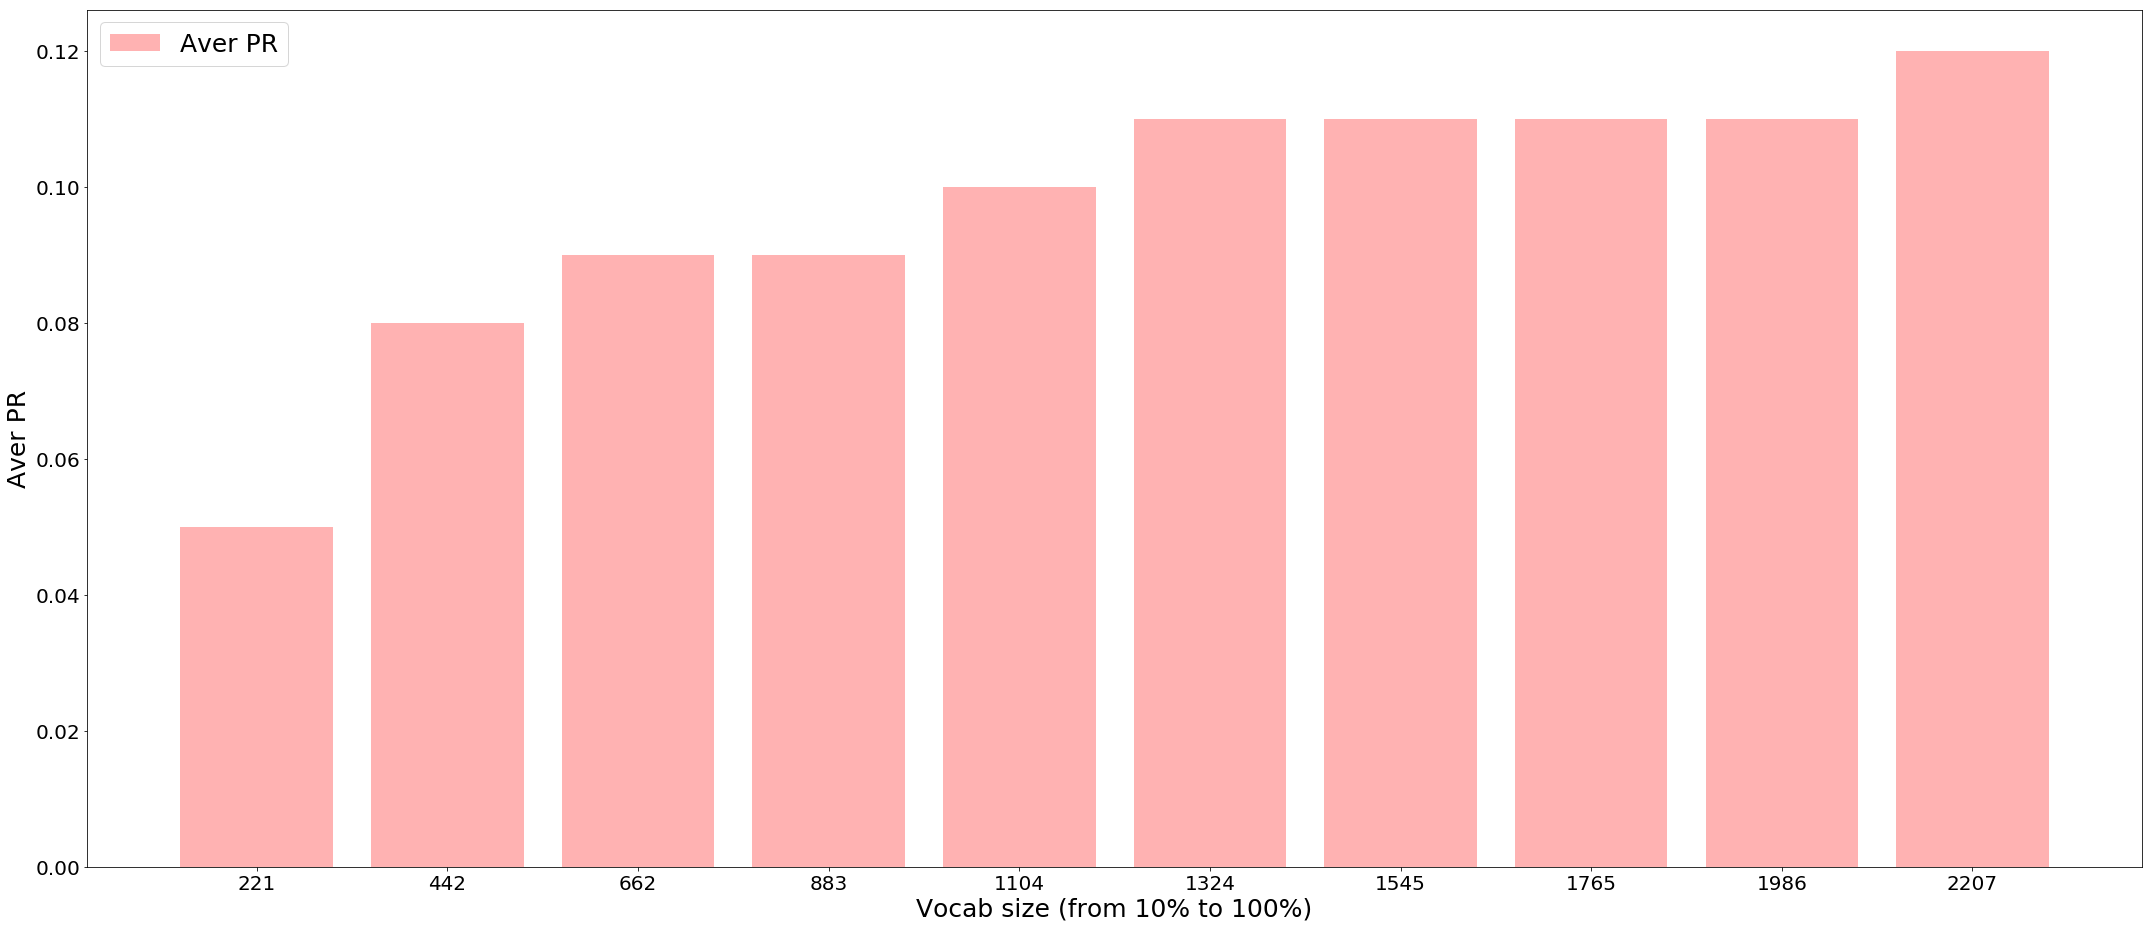

In [6]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in sizes], 
                aver_prs,
                alpha=0.3,
                color='red',
                label='Aver PR')

ax.set_xlabel('Vocab size (from 10% to 100%)', size=25)
ax.set_ylabel('Aver PR', size=25)
# ax.set_xticklabels(labs)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

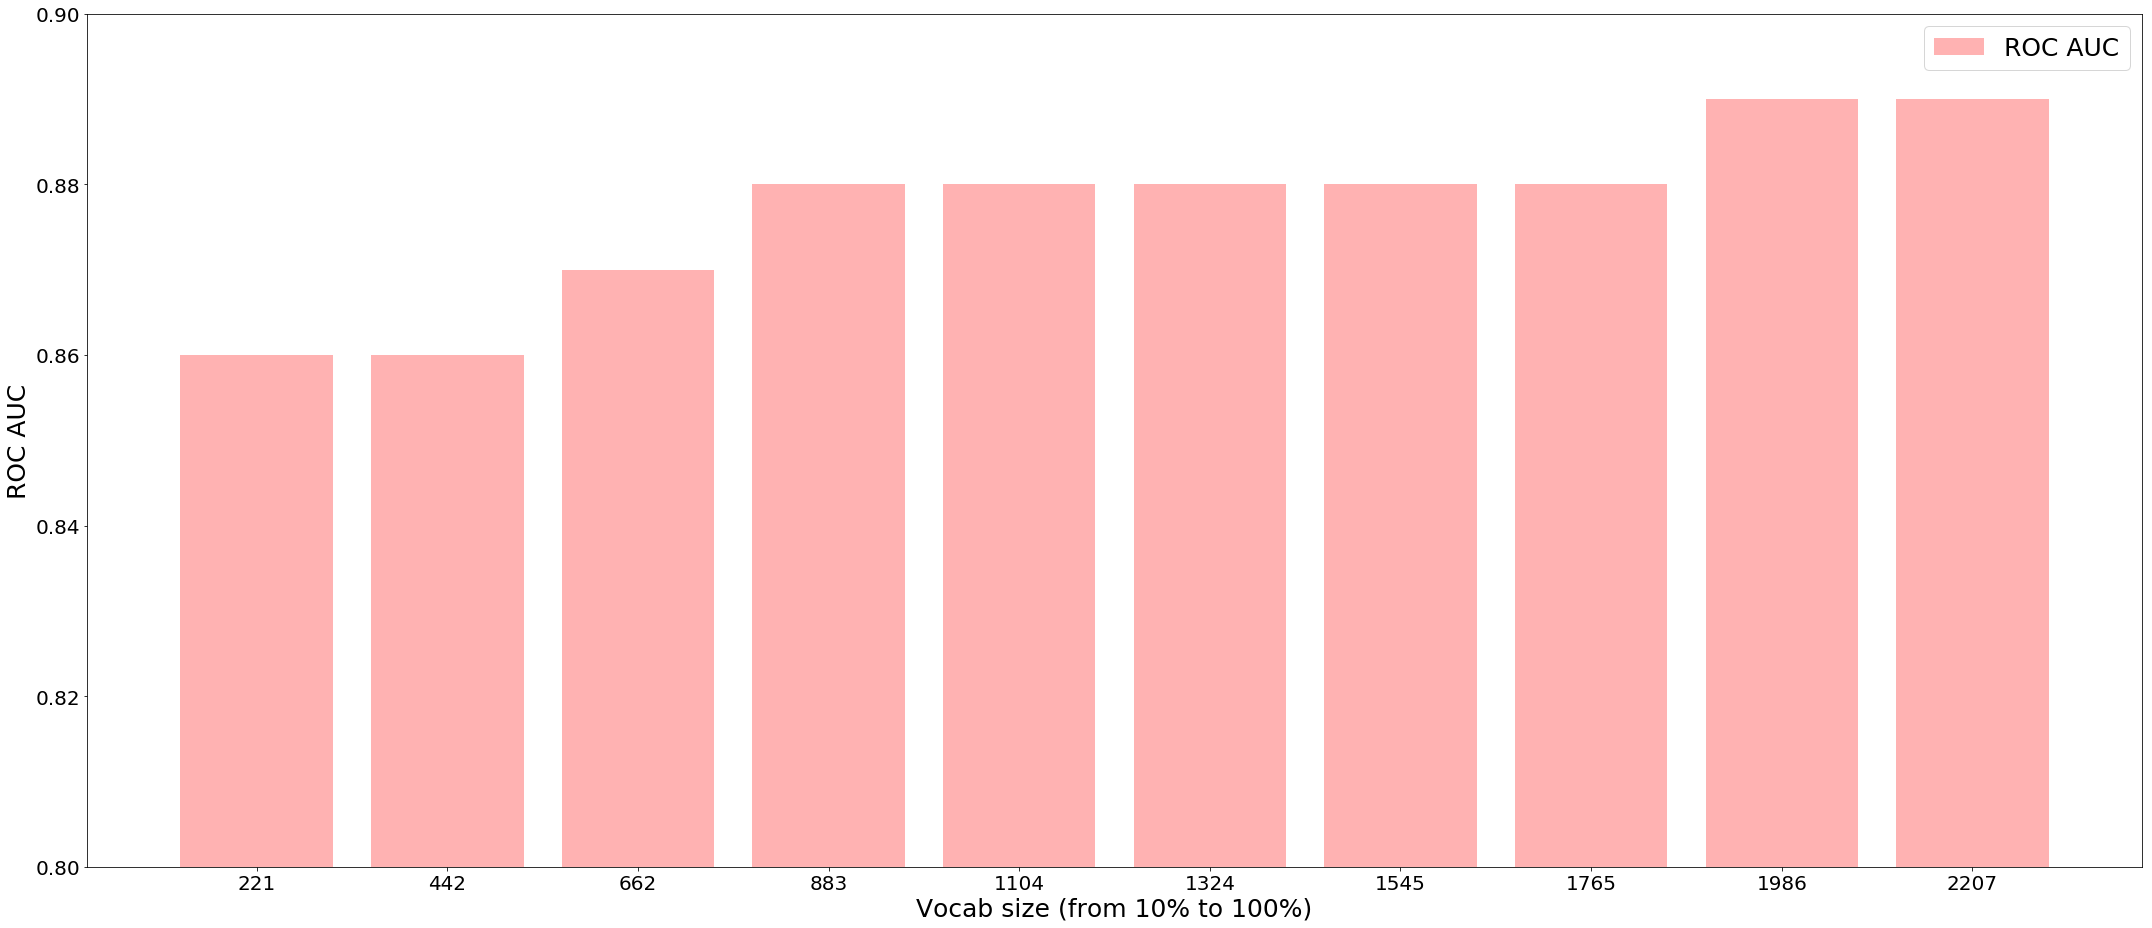

In [9]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in sizes], 
                roc_aucs,
                alpha=0.3,
                color='red',
                label='ROC AUC')

ax.set_xlabel('Vocab size (from 10% to 100%)', size=25)
ax.set_ylabel('ROC AUC', size=25)
# ax.set_xticklabels(labs)
ax.set_ylim(0.8, 0.9)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

## How number of units and embedding size affect metrics

In [10]:
filenames = glob.glob('experiments/emb_size_experiment/sw*/*.yaml')

In [11]:
emb_dims = []
num_units = []
f1s = []
aver_prs = []
roc_aucs = []

for filename in filenames:
    config = get_yaml_config(filename)
    try:
        f1s.append(np.round(float(config['f1']), 2))
        aver_prs.append(np.round(float(config['aver_pr']), 2))
        roc_aucs.append(np.round(float(config['roc_auc']), 2))
        emb_dims.append(int(config['emb_dim']))
        num_units.append(int(config['units']['swem_max']))
    except KeyError:
        pass

In [12]:
f1s = [x for x, y in sorted(zip(f1s, emb_dims))]
aver_prs = [x for x, y in sorted(zip(aver_prs, emb_dims))]
roc_aucs = [x for x, y in sorted(zip(roc_aucs, emb_dims))]
emb_dims = sorted(emb_dims)
num_units = sorted(num_units)

labels = [f'emb_dim={emb_dims[i]},units={num_units[i]}' for i in range(len(emb_dims))]

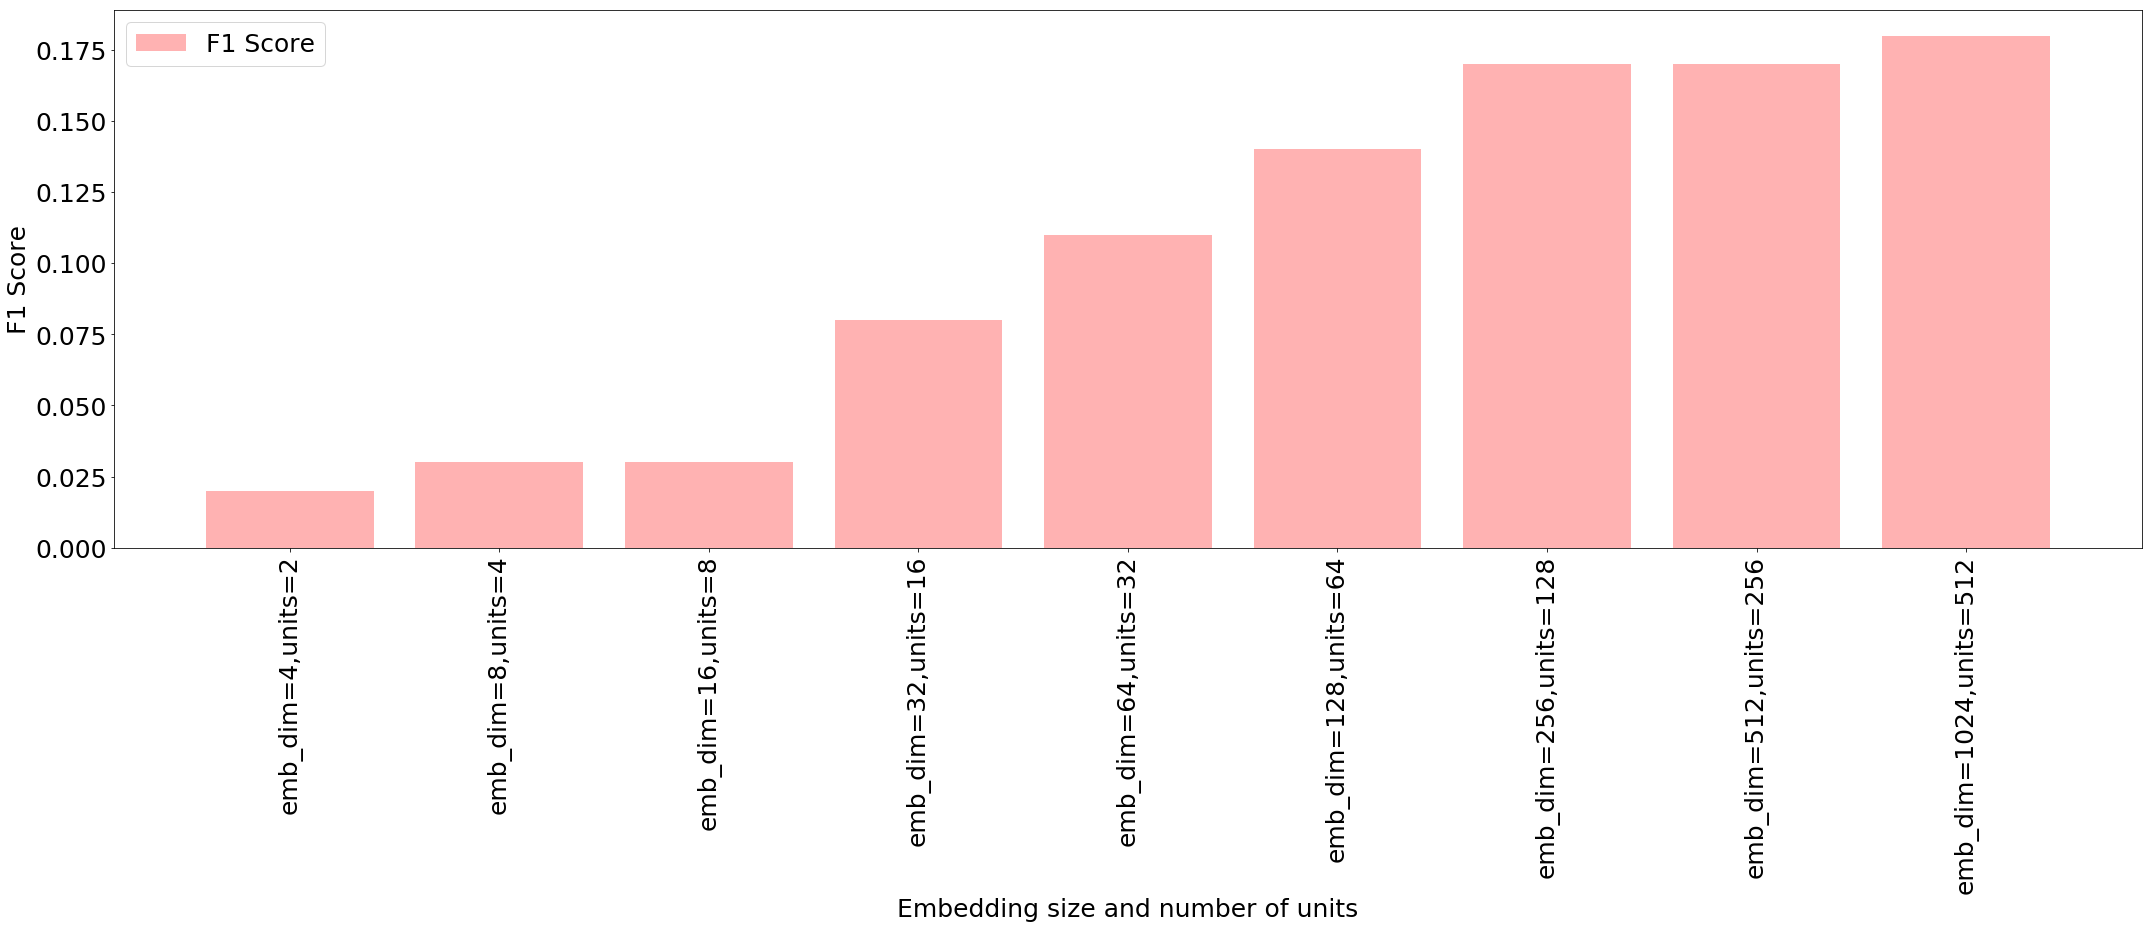

In [13]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar(labels, 
                f1s,
                alpha=0.3,
                color='red',
                label='F1 Score')

ax.set_xlabel('Embedding size and number of units', size=25)
ax.set_ylabel('F1 Score', size=25)
ax.legend(prop={'size': 25})
ax.set_xticklabels(labels, rotation='vertical')
ax.tick_params(labelsize=25)

fig.tight_layout()
plt.show()

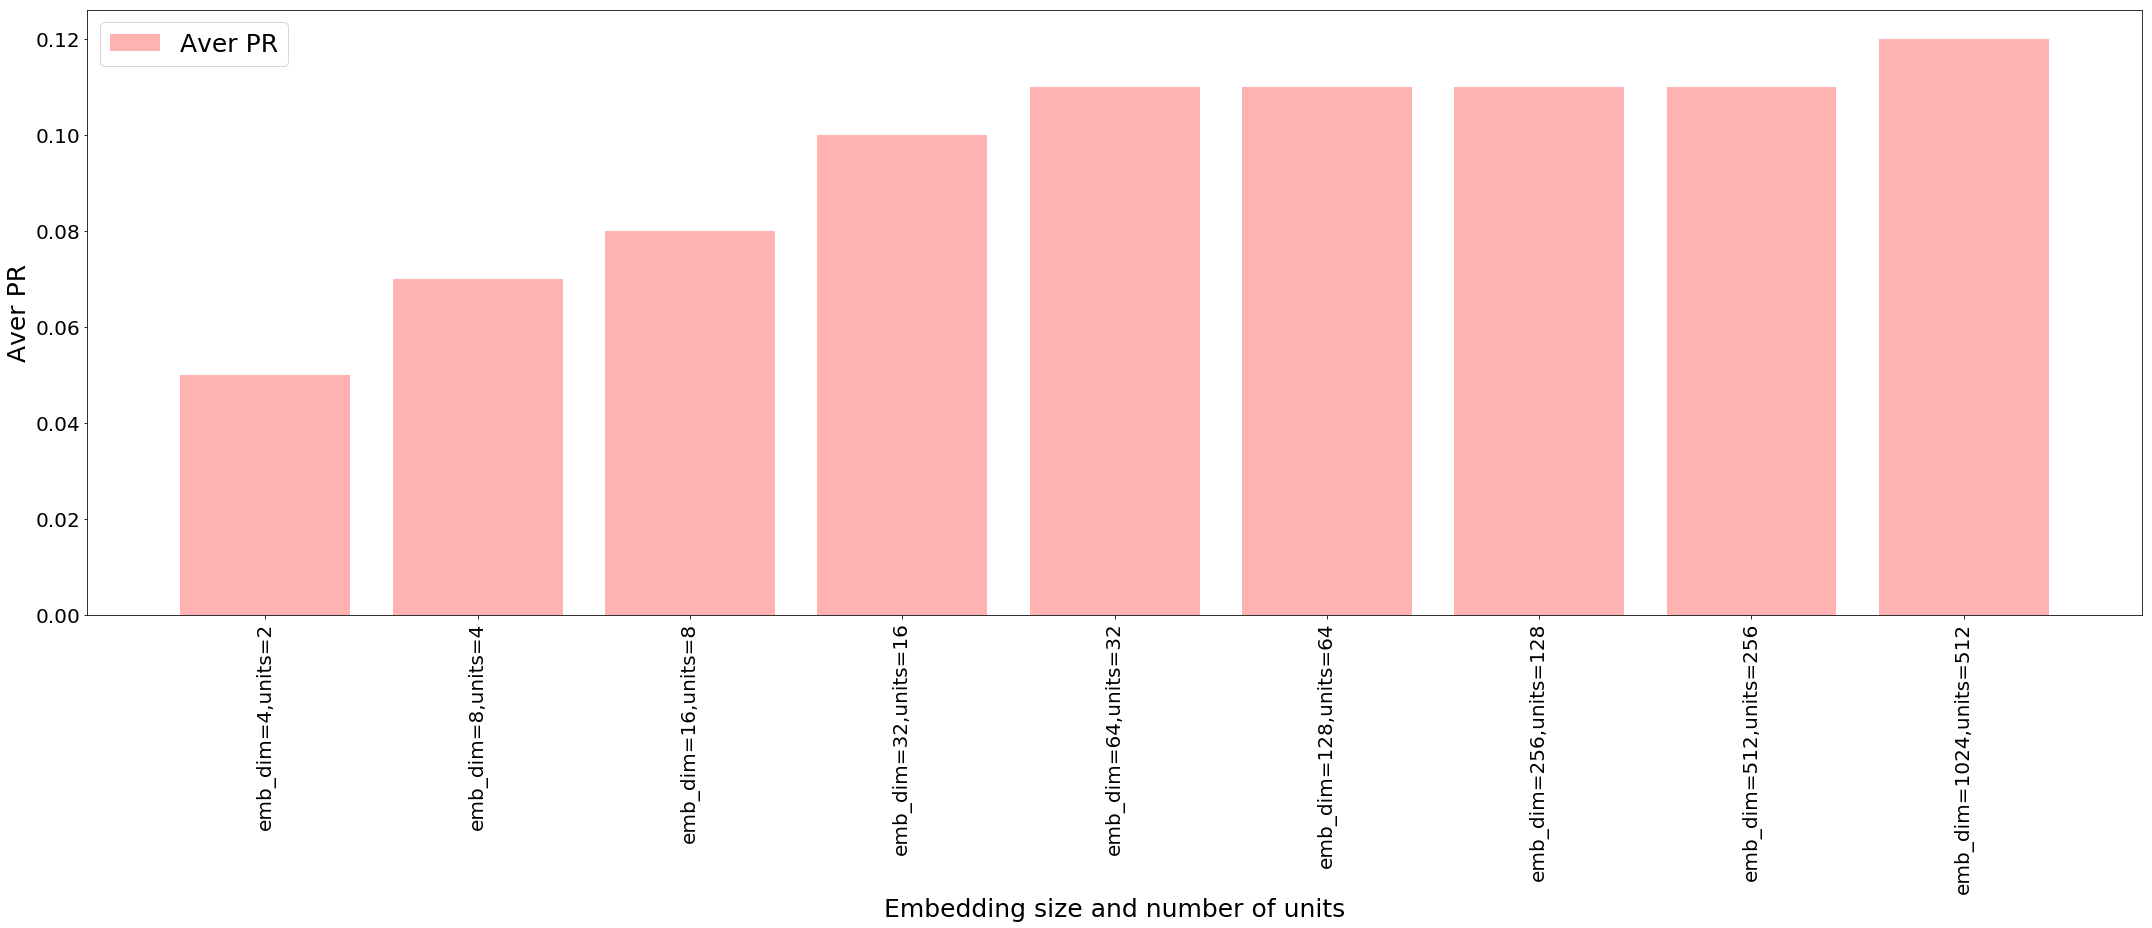

In [14]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar(labels, 
                aver_prs,
                alpha=0.3,
                color='red',
                label='Aver PR')

ax.set_xlabel('Embedding size and number of units', size=25)
ax.set_ylabel('Aver PR', size=25)
# ax.set_xticklabels(labs)
ax.set_xticklabels(labels, rotation='vertical')
ax.tick_params(labelsize=25)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

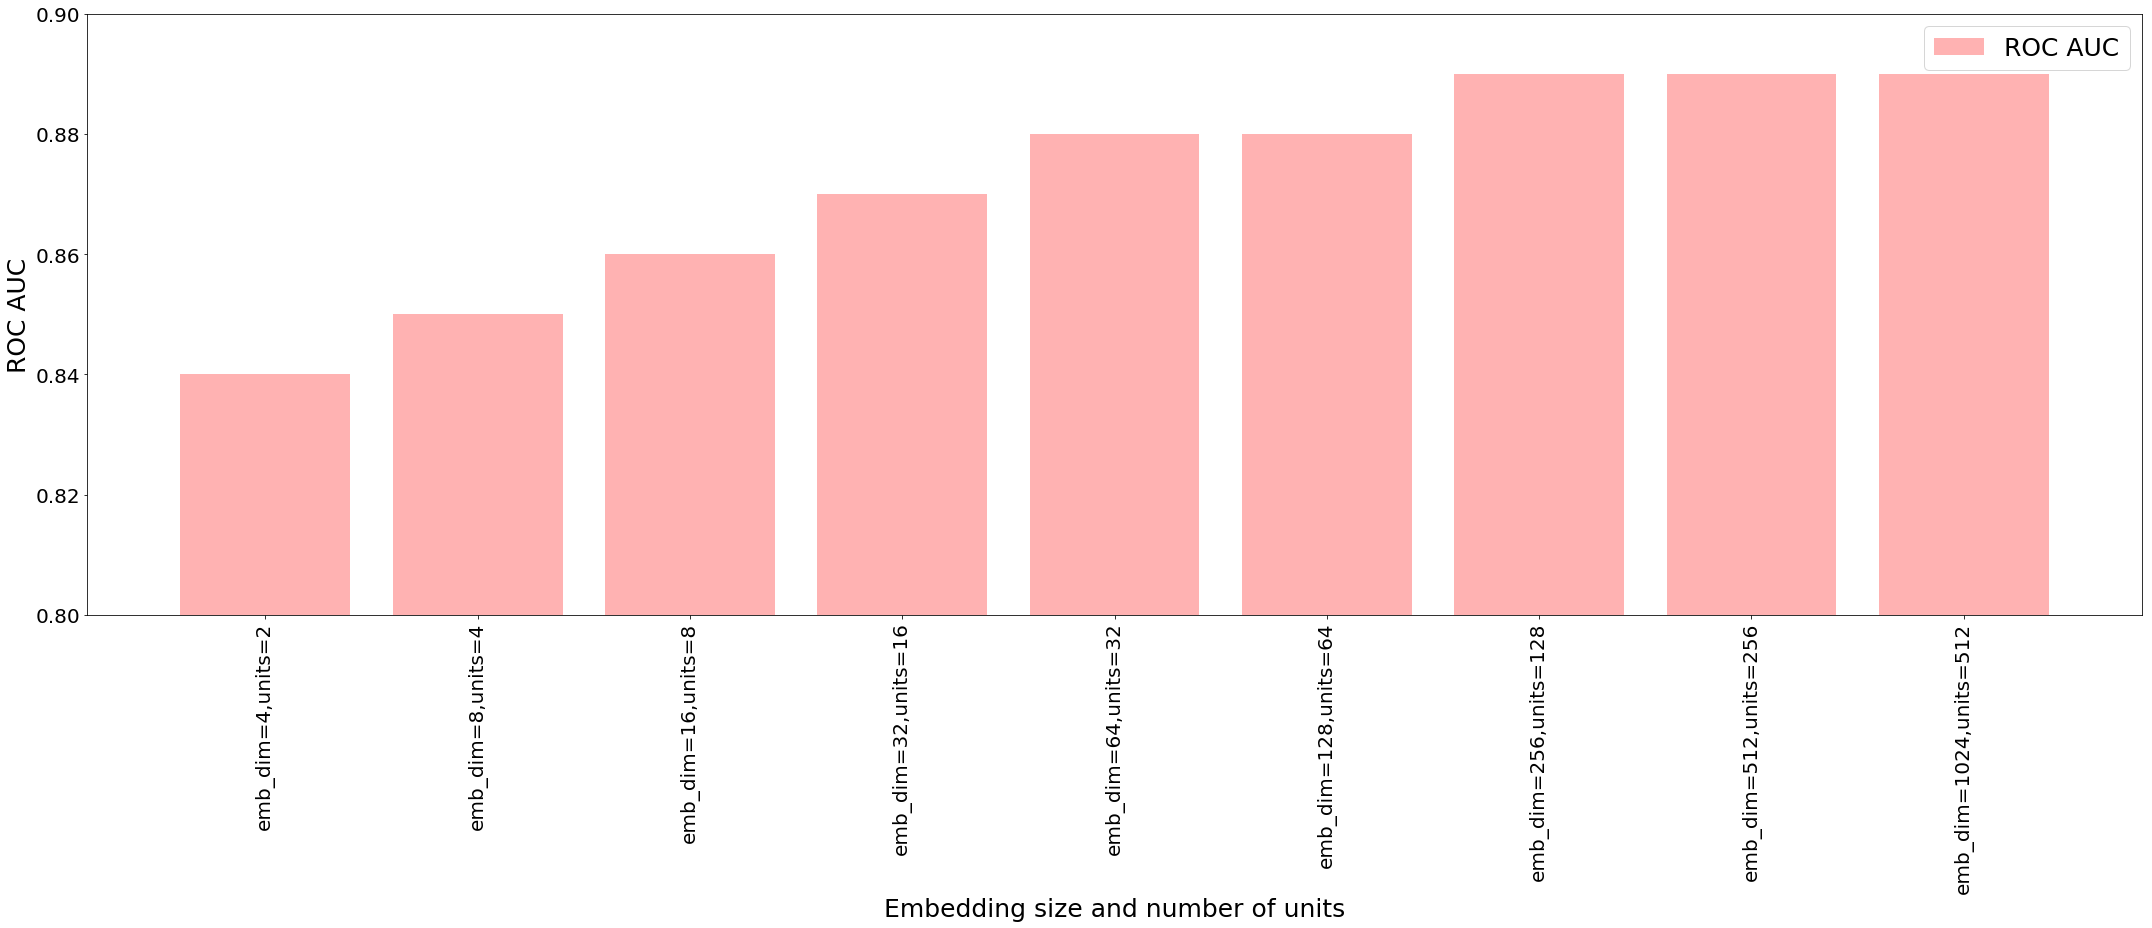

In [16]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar(labels, 
                roc_aucs,
                alpha=0.3,
                color='red',
                label='ROC AUC')

ax.set_xlabel('Embedding size and number of units', size=25)
ax.set_ylabel('ROC AUC', size=25)
# ax.set_xticklabels(labs)
ax.set_xticklabels(labels, rotation='vertical')
ax.tick_params(labelsize=25)
ax.legend(prop={'size': 25})
ax.set_ylim(0.8, 0.9)
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

# Seq len for predictions

In [8]:
# the model was trained with seq_len = 40

pathes = glob.glob('experiments/emb_size_experiment/swem_max_emb_size=512,unit_size=256/config_*')

In [20]:
seq_lens = []
f1s = []
aver_prs = []
roc_aucs = []

for filename in pathes:
    config = get_yaml_config(filename)
    # print(config['seq_len'])
    seq_lens.append(int(config['seq_len']))
    f1s.append(np.round(float(config['f1']), 7))
    aver_prs.append(np.round(float(config['aver_pr']), 7))
    roc_aucs.append(np.round(float(config['roc_auc']), 7))

In [21]:
f1s = [x for x, y in sorted(zip(f1s, seq_lens))]
aver_prs = [x for x, y in sorted(zip(aver_prs, seq_lens))]
roc_aucs = [x for x, y in sorted(zip(roc_aucs, seq_lens))]
seq_lens = sorted(seq_lens)

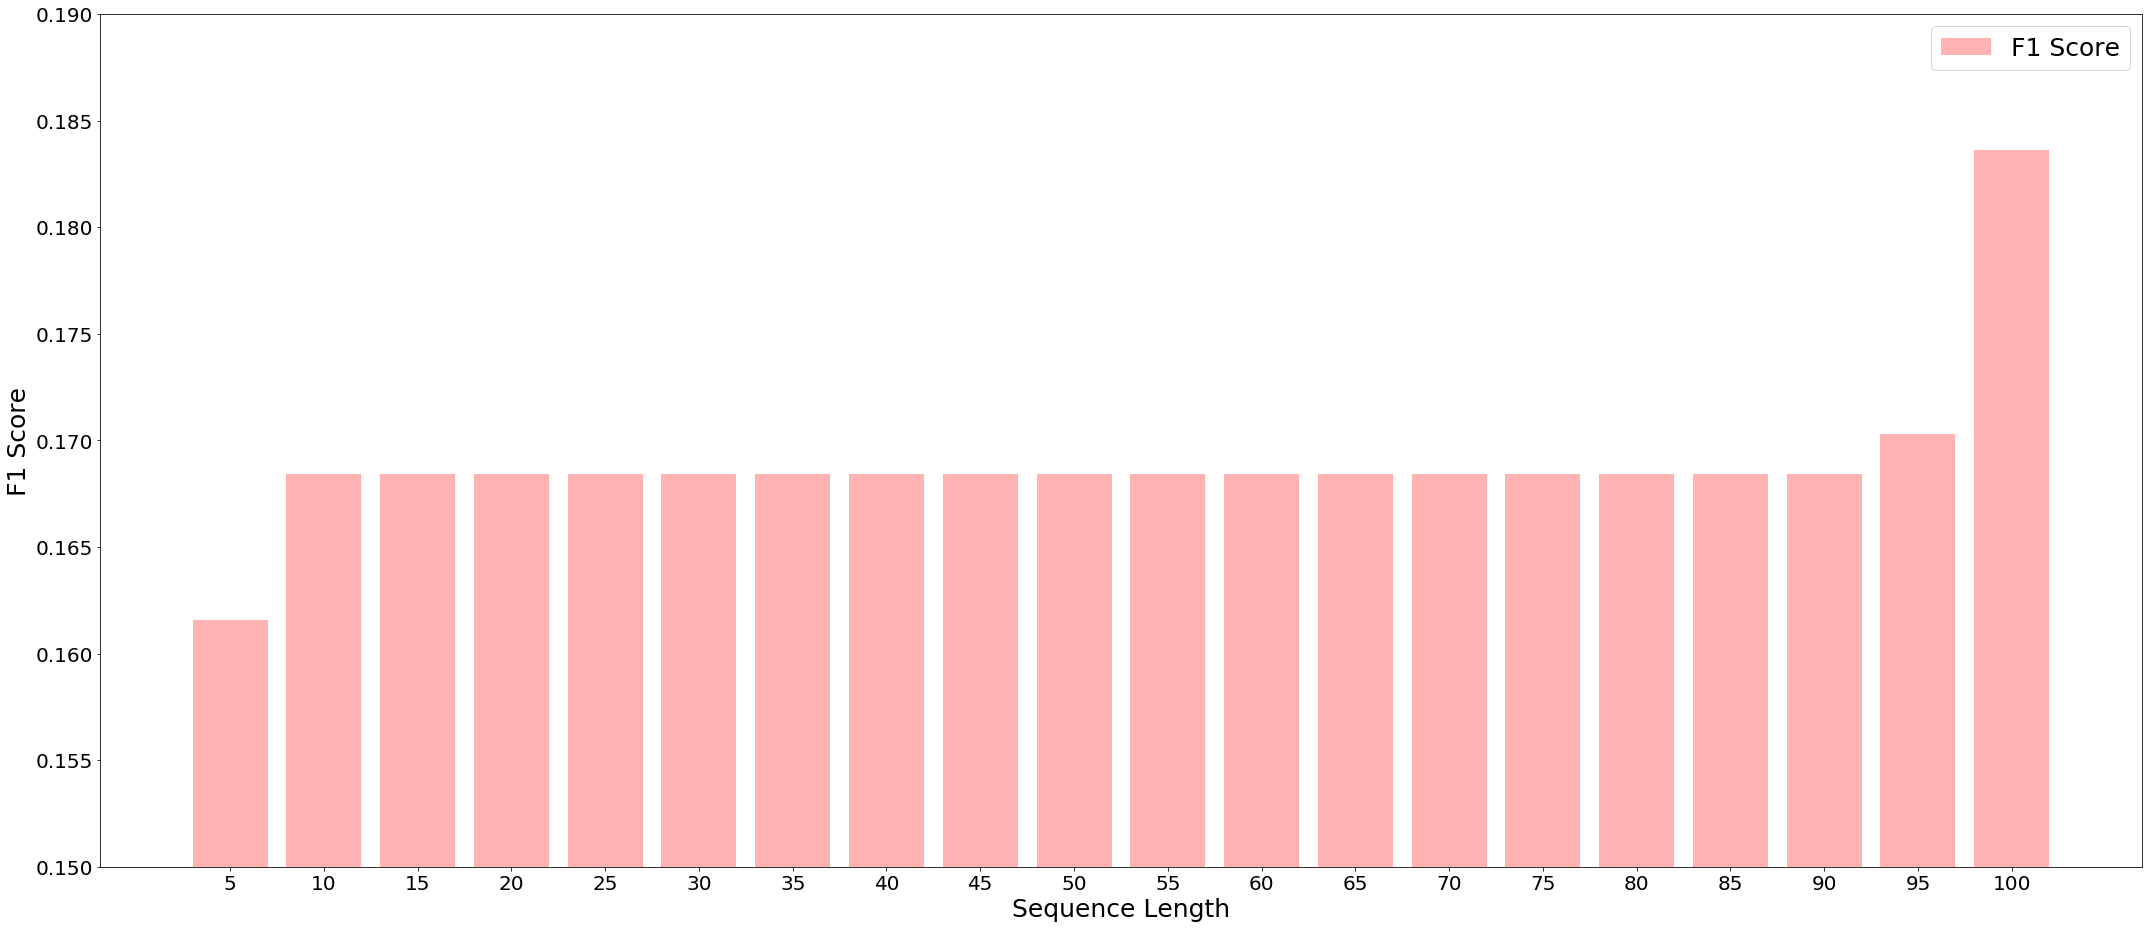

In [29]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in seq_lens], 
                f1s,
                alpha=0.3,
                color='red',
                label='F1 Score')

ax.set_xlabel('Sequence Length', size=25)
ax.set_ylabel('F1 Score', size=25)
# ax.set_xticklabels(labs)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)
ax.set_ylim(0.15, 0.19)

fig.tight_layout()
plt.show()

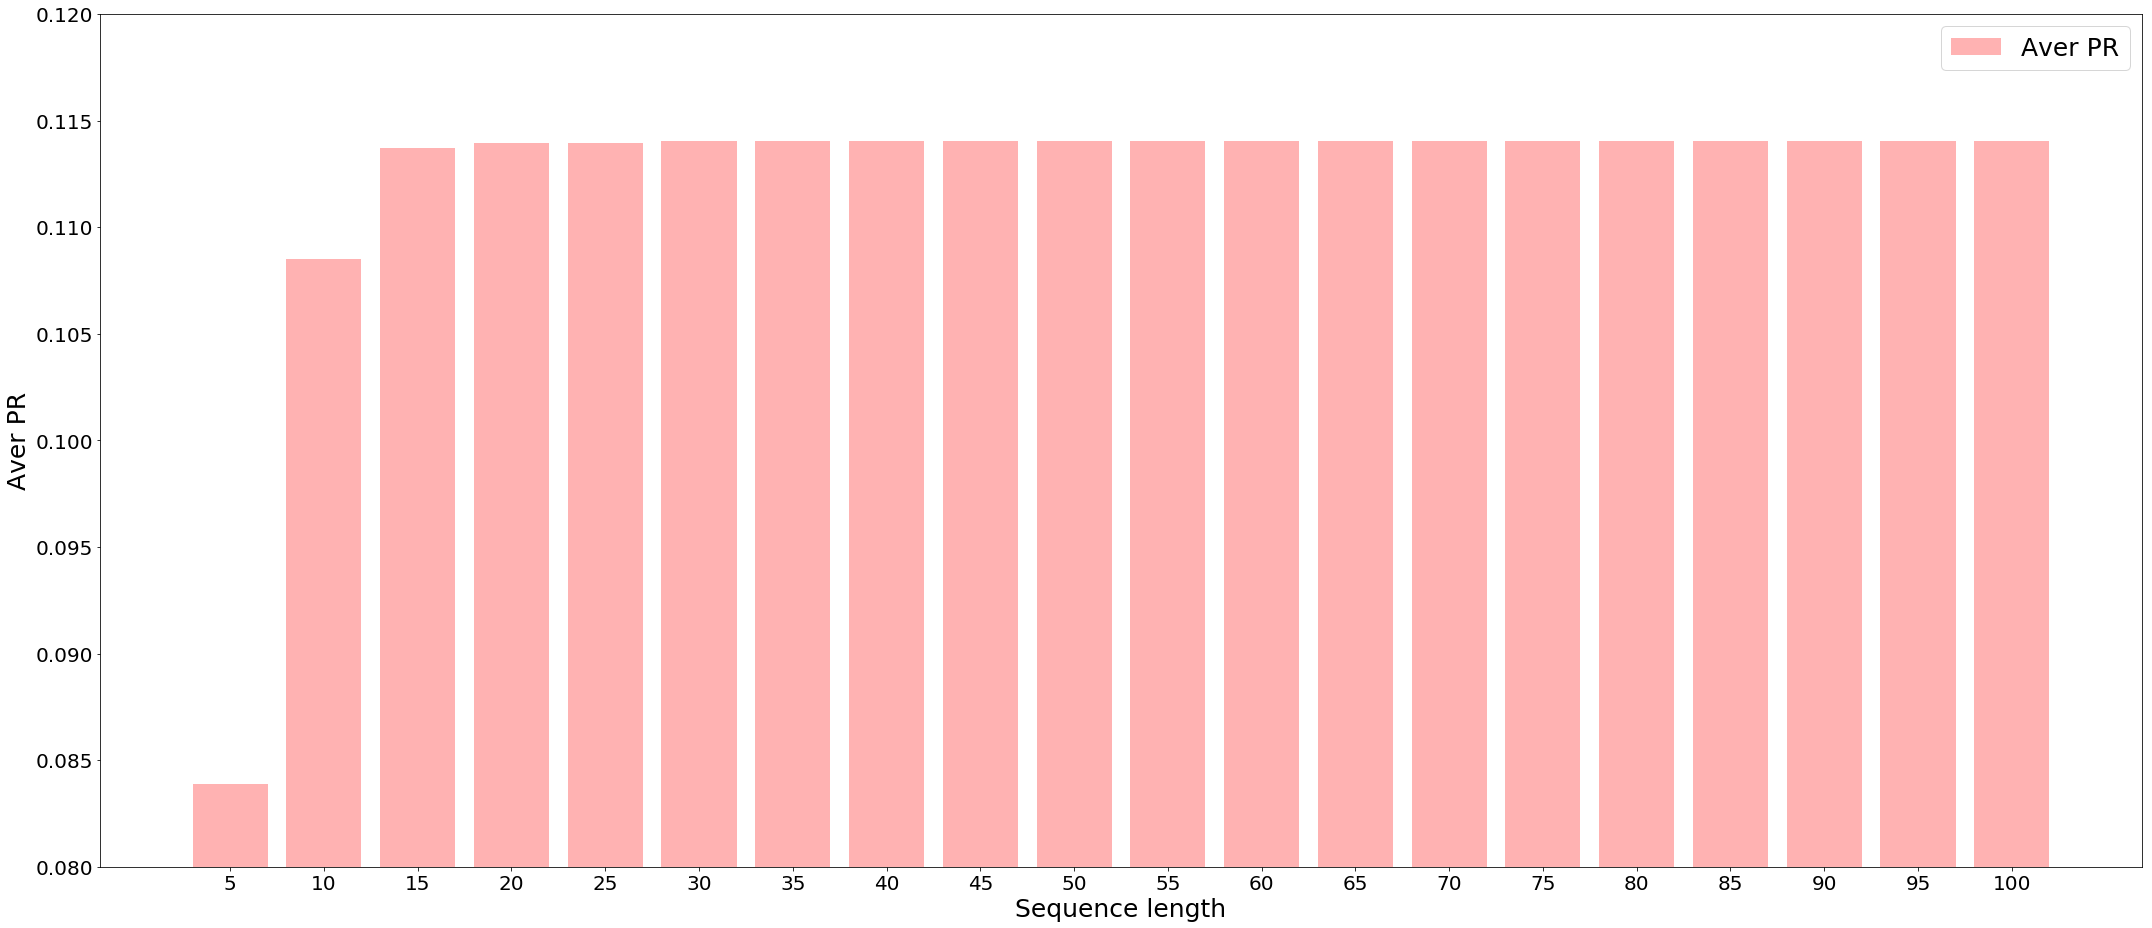

In [30]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in seq_lens], 
                aver_prs,
                alpha=0.3,
                color='red',
                label='Aver PR')

ax.set_xlabel('Sequence length', size=25)
ax.set_ylabel('Aver PR', size=25)
# ax.set_xticklabels(labs)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)
ax.set_ylim(0.08, 0.12)

fig.tight_layout()
plt.show()

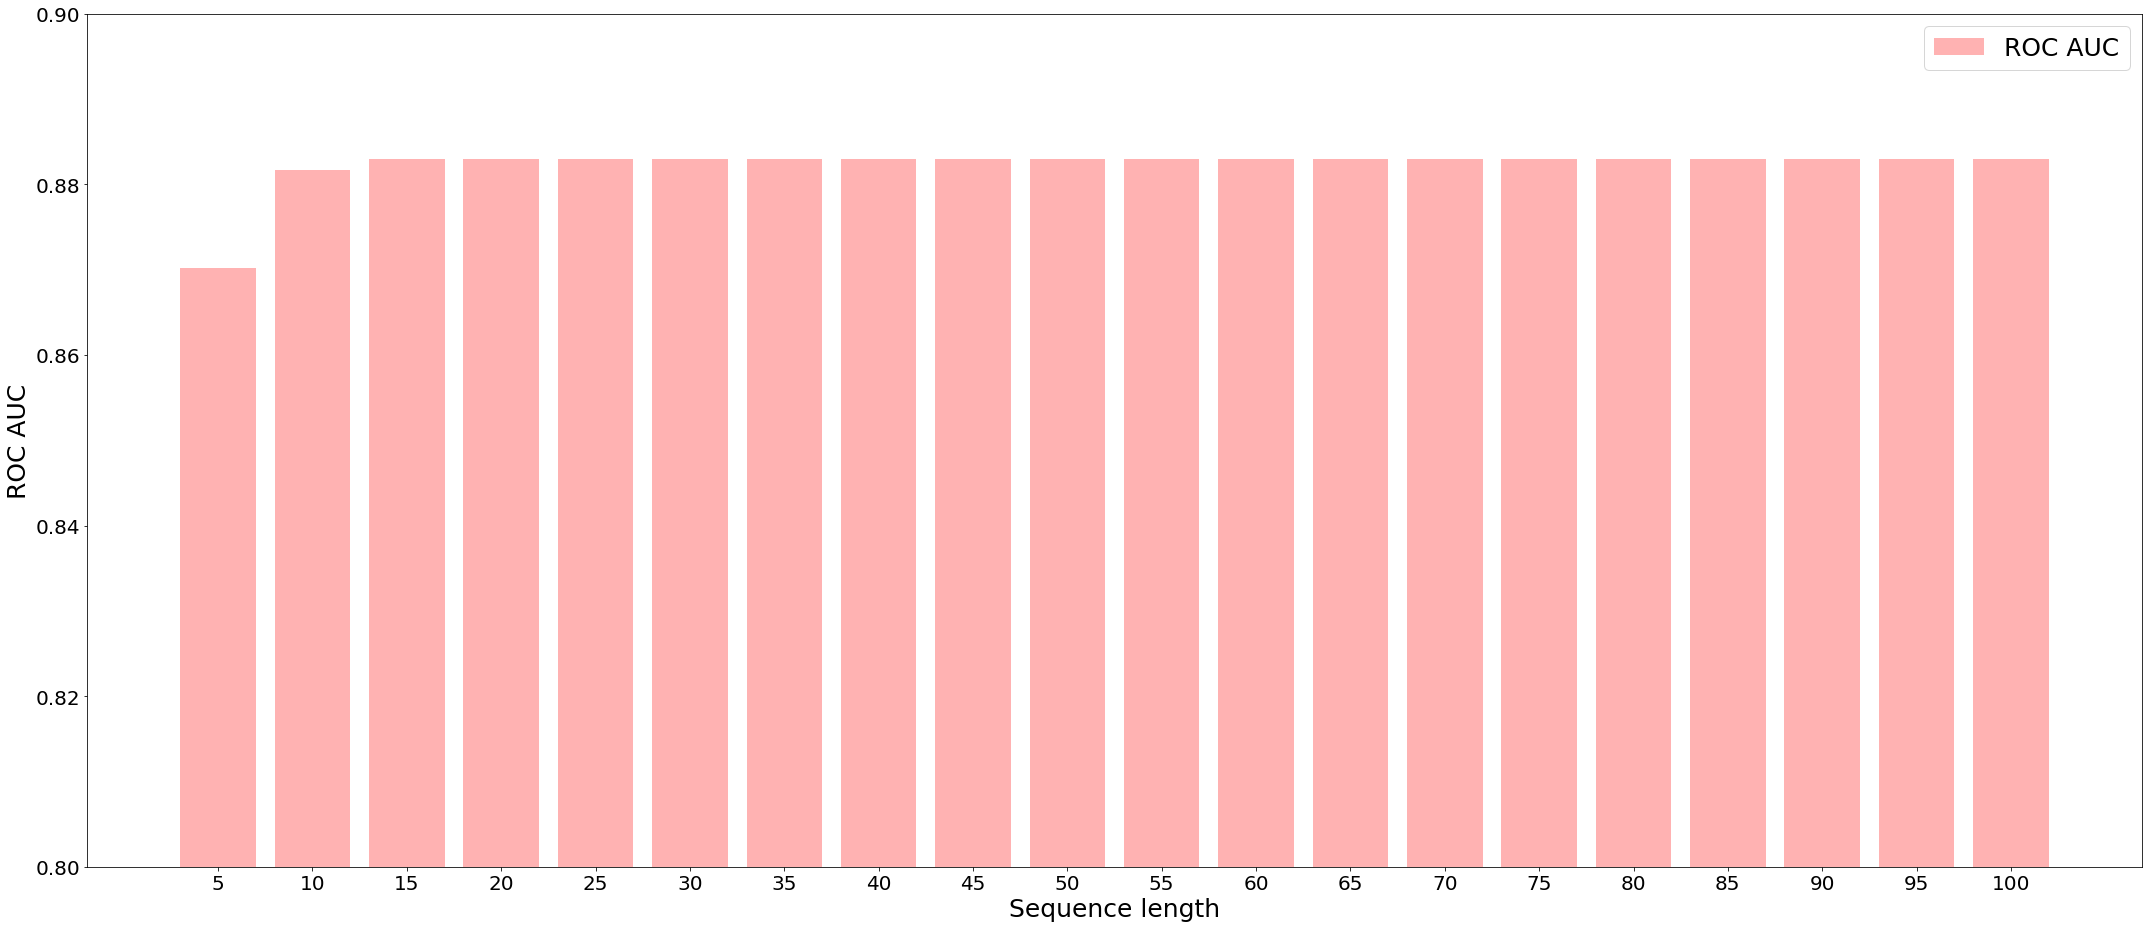

In [24]:
fig, ax = plt.subplots(figsize=(30, 13))

rects1 = ax.bar([str(s) for s in seq_lens], 
                roc_aucs,
                alpha=0.3,
                color='red',
                label='ROC AUC')

ax.set_xlabel('Sequence length', size=25)
ax.set_ylabel('ROC AUC', size=25)
# ax.set_xticklabels(labs)
ax.set_ylim(0.8, 0.9)
ax.legend(prop={'size': 25})
ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()